# Análise de tendência com o teste *Mann-Kendall* para o Índice de Precipitação Padronizado (SPI) de Recife.

- Vanessa Karoline Inácio Gomes

- Vaniele da Silva Barros

- Ivanildo Batista da Silva Júnior

##  Índice de Precipitação Padronizado (SPI)

<div style="text-align: right">  
    
O Índice de Precipitação Padronizado (SPI) foi desenvolvido por *McKee*, *Doesken*, e *Kleis* (1993) para quantificar o déficit de precipitação em múltiplas escalas de tempo (1, 3, 6, 12, 24 e 48 meses) e é recomendado pela Organização Meteorológica Mundial (OMM) para caracterizar a severidade da seca (Hayes et al., 2011). Para o cálculo do SPI, primeiro é necessário ajustar a função densidade de probabilidade (fdp) para o conjunto de dados de precipitação. Dentre as várias distribuições propostas na literatura (*Stagge et al*., 2005; *Svensson*, *Hannaford* & *Prosdocimi*, 2017), neste trabalho, foi adotada a distribuição gama, que é amplamente utilizada para ajustar séries temporais de precipitação (*McKee*, *Doesken* & *Kleist*, 1993).


### Habilitando o *R* no *Colab*

Além da linguagem *Python*, o *Colab* permite usar as linguagens *R* e *Julia*.

In [1]:
%load_ext rpy2.ipython


### Instalando a biblioteca *standard-precip* para calcular o SPI

Essa biblioteca realiza o cálculo do SPI e do SPEI (Índice Padronizado de Evapotranspiração).

In [2]:
pip install standard-precip


     |████████████████████████████████| 28.5MB 112kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


Pacotes para calcular o SPI no *R*.

1) **SPEI** : https://cran.r-project.org/web/packages/SPEI/SPEI.pdf

2) **SPIGA** : https://cran.r-project.org/web/packages/SPIGA/SPIGA.pdf

3) **precintcon** : https://cran.r-project.org/web/packages/precintcon/precintcon.pdf

4) **SCI** : https://cran.r-project.org/web/packages/SCI/SCI.pdf

Será usado o pacote **SPEI**.

#### Instalando os pacotes do *R*

In [3]:
%%R

install.packages("SPEI")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘RcppArmadillo’, ‘goftest’, ‘Lmoments’, ‘lmomco’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/RcppArmadillo_0.10.5.0.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1669395 bytes (1.6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

## Teste *Mann-Kendall*

O Teste *Mann-Kendall* (*Mann*, 1945; *Kendall*, 1975) é utilizado para determinar se uma série de dados possui tendência temporal estatisticamente significativa.

### Hipóteses do teste

$H_0$ : Não há tendência presente nos dados.

$H_1$ : Há tendência nos dados.


Para saber se há tendência o *p-valor* do teste deve ser inferior ao nível de significância definido, para que a hipótese nula seja rejeitada. Para saber se a tendência é crescente ou decrescente, observa-se o sinal da estatística $Z$.

- **S (Valor da estatística S)**:  um valor negativo para **S** indica que a tendência é decrescente ao longo do tempo (ao longo do tempo tem-se mais diferenças negativas do que positivas). Semelhantemente, um valor positivo indica uma tendência ascendente ao longo do tempo. Um valor **S** próximo a zero indica um número quase igual de diferenças positivas e negativas e  indica ausência de tendência;


- **varS** : A distribuição da estatística S é aproximadamente normal com média igual a zero;


- **tau** : A estatística **S** tem intima relação com o coeficiente de correlação de classificação $\tau$ de *Kendall*;

- **Estatística Z** : Para um número pequeno de dados, a estatística de teste padronizado **Z** fornece uma boa aproximação para a distribuição normal e pode ser usada para o teste de hipótese;


- **n** : número de dados na série temporal


- **p-value (p-valor)** : teste estatístico. Se maior que o nível de significância, aceita-se a hipótese nula, caso contrário, rejeita-se a hipótse nula.

### Instalando a biblioteca *pymannkendall*.

In [4]:
pip install pymannkendall


### Pacotes para calcular o teste *Mann-Kendall* no *R*.

1) **Kendall** : https://cran.r-project.org/web/packages/Kendall/Kendall.pdf

2) **trend** : https://cran.r-project.org/web/packages/trend/trend.pdf


In [5]:
%%R

install.packages("trend")
install.packages("Kendall")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘extraDistr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/extraDistr_1.9.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 147894 bytes (144 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

### Importando as bibliotecas e módulos do *Python*

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pymannkendall as mk

from datetime import date
from standard_precip import spi
from standard_precip.utils import plot_index


### Importando os pacotes do *R*

In [7]:
%%R

library(SPEI)
library(trend)
library(Kendall)


R[write to console]: Loading required package: lmomco

R[write to console]: # Package lmomco (2.3.6) loaded [try lmomcoNews()].

R[write to console]: Loading required package: parallel

R[write to console]: Loading required package: ggplot2

R[write to console]: # Package SPEI (1.7) loaded [try SPEINews()].



### Importando os dados

Foram utilizadas séries temporais de precipitação mensais entre os anos de 1962 e 2019 da estação climatológica Recife (Curado), localizada nas latitude -8,05° sul e longitude -34,95° oeste, instalada à 11,3 m de altura. Os dados foram fornecidos pelo Instituto Nacional de Meteorologia (INMET).

In [8]:
chuva = pd.read_csv("Recife.txt",sep="\t")


Convertendo os anos e os meses em uma único dado.


In [9]:
DATE=[]
for y, m in zip(chuva['year'], chuva['month']):
    DATE.append(date(y, m, 1))

chuva['DATE'] = DATE

Excluindo as colunas *year* e *month*.

In [10]:
chuva=chuva.drop(['year','month'], axis=1)
chuva = chuva[['DATE','prec']]

Salvando os dados em CSV.

In [11]:
chuva.to_csv('chuva.csv')

#### Importando os dados no *R*

In [12]:
%%R

chuva = read.csv('chuva.csv')


Primeiras linhas da série de precipitação.

In [13]:
chuva.head()


,DATE,prec
0,1962-01-01,0.0
1,1962-02-01,90.5
2,1962-03-01,155.6
3,1962-04-01,128.0
4,1962-05-01,286.1


No *R*.

In [14]:
%%R

head(chuva)


  X       DATE  prec
1 0 1962-01-01   0.0
2 1 1962-02-01  90.5
3 2 1962-03-01 155.6
4 3 1962-04-01 128.0
5 4 1962-05-01 286.1
6 5 1962-06-01 562.6


Série de precipitação em *python*

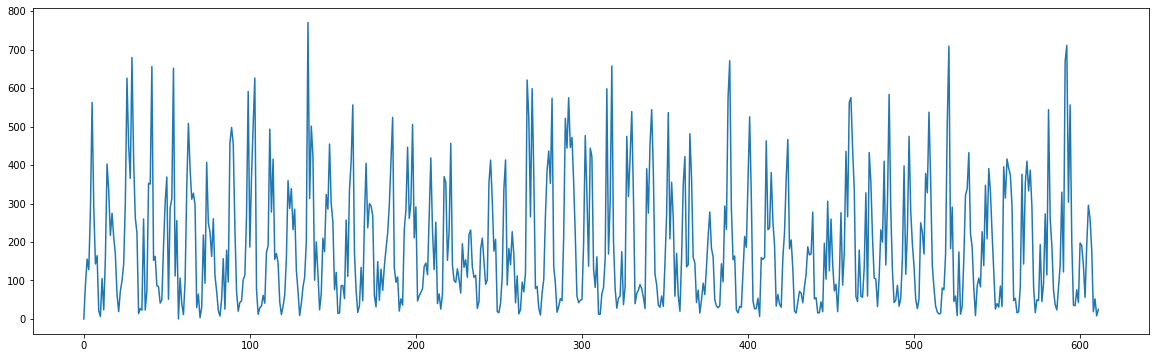

In [15]:
chuva['prec'].plot(figsize=(20,6));


Plotagem da série no *R*.

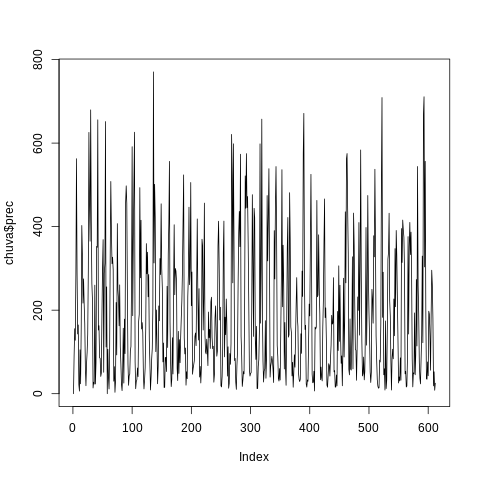

In [16]:
%%R

plot(chuva$prec, type = "l")


### Calculando o SPI

Abaixo será calculado o índice SPI para as escalas 1, 3 (curto prazo), 6 (médio prazo) e 12, 24 e 48 (longo prazo).

Em *Python*.

In [17]:
spi_mensal1 = spi.SPI().calculate(chuva,'DATE','prec',freq="M", scale=1,fit_type="lmom", dist_type="gam")
spi_mensal3 = spi.SPI().calculate(chuva,'DATE','prec',freq="M", scale=3,fit_type="lmom", dist_type="gam")
spi_mensal6 = spi.SPI().calculate(chuva,'DATE','prec',freq="M", scale=6,fit_type="lmom", dist_type="gam")
spi_mensal12 = spi.SPI().calculate(chuva,'DATE','prec',freq="M", scale=12,fit_type="lmom", dist_type="gam")
spi_mensal24 = spi.SPI().calculate(chuva,'DATE','prec',freq="M", scale=24,fit_type="lmom", dist_type="gam")
spi_mensal48 = spi.SPI().calculate(chuva,'DATE','prec',freq="M", scale=48,fit_type="lmom", dist_type="gam")


Em *R*.

In [18]:
%%R

spi1 <- spi(na.omit(chuva$prec), 1)
spi3 <- spi(na.omit(chuva$prec), 3)
spi6 <- spi(na.omit(chuva$prec), 6)
spi12 <- spi(na.omit(chuva$prec), 12)
spi24 <- spi(na.omit(chuva$prec), 24)
spi48 <- spi(na.omit(chuva$prec), 48)


#### Plotando os índices de cada escala

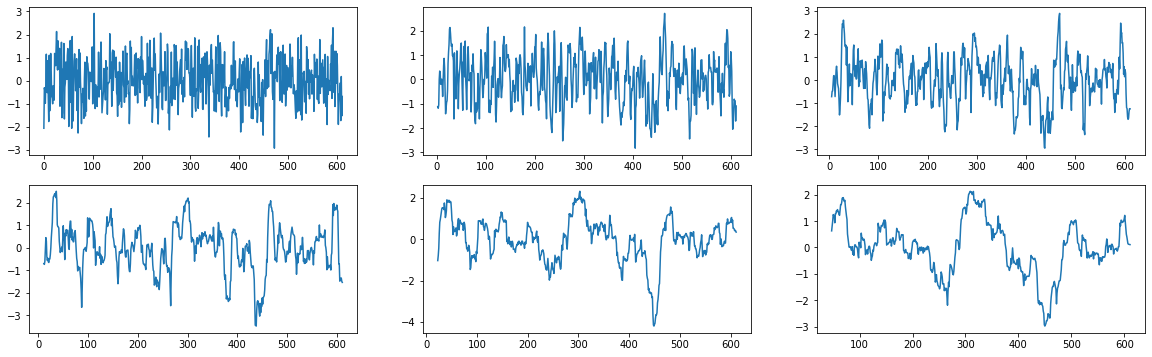

In [19]:
fig, ax = plt.subplots(2,3, figsize=(20,6))
spi_mensal1['prec_calculated_index'].plot(ax=ax[0][0])
spi_mensal3['prec_scale_3_calculated_index'].plot(ax=ax[0][1])
spi_mensal6['prec_scale_6_calculated_index'].plot(ax=ax[0][2])
spi_mensal12['prec_scale_12_calculated_index'].plot(ax=ax[1][0])
spi_mensal24['prec_scale_24_calculated_index'].plot(ax=ax[1][1])
spi_mensal48['prec_scale_48_calculated_index'].plot(ax=ax[1][2]);

Em *R*.

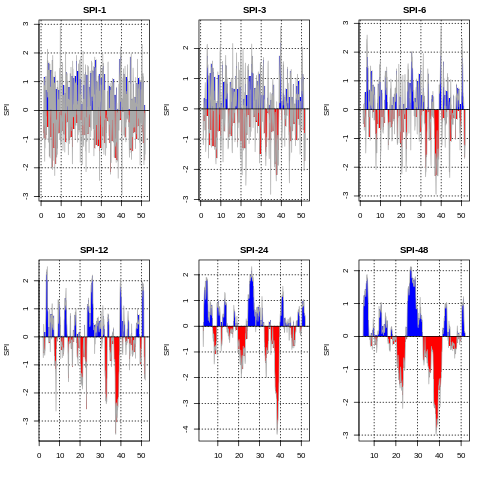

In [20]:
%%R

par(mfrow=c(2,3))
plot(spi1, 'SPI-1')
plot(spi3, 'SPI-3')
plot(spi6, 'SPI-6')
plot(spi12, 'SPI-12')
plot(spi24, 'SPI-24')
plot(spi48, 'SPI-48')


#### Histograma de cada índice

Em *Python*.

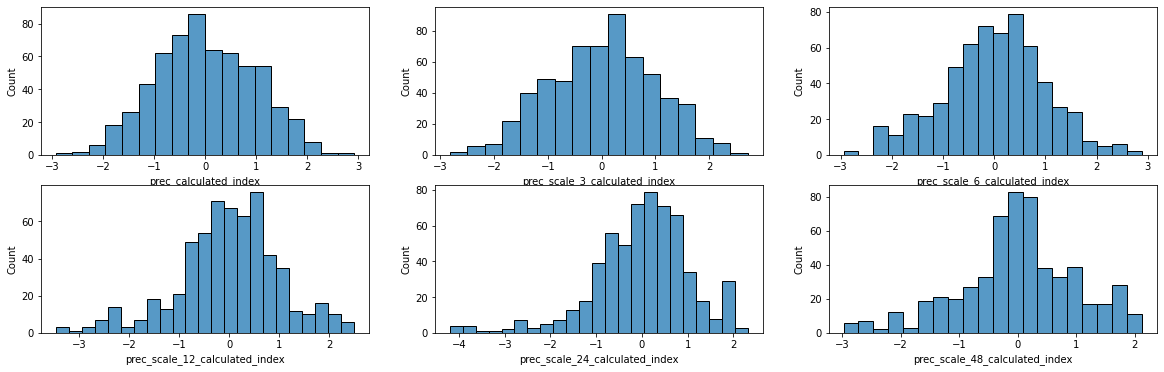

In [21]:
fig, ax = plt.subplots(2,3, figsize=(20,6))
sns.histplot(spi_mensal1['prec_calculated_index'], ax=ax[0][0])
sns.histplot(spi_mensal3['prec_scale_3_calculated_index'], ax=ax[0][1])
sns.histplot(spi_mensal6['prec_scale_6_calculated_index'], ax=ax[0][2])
sns.histplot(spi_mensal12['prec_scale_12_calculated_index'], ax=ax[1][0])
sns.histplot(spi_mensal24['prec_scale_24_calculated_index'], ax=ax[1][1])
sns.histplot(spi_mensal48['prec_scale_48_calculated_index'], ax=ax[1][2]);


Em *R*.

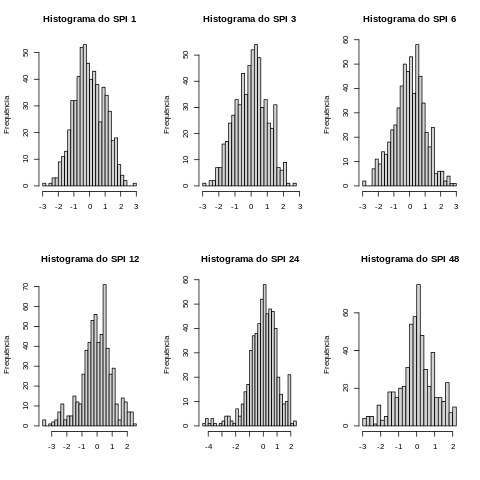

In [25]:
%%R
par(mfrow=c(2,3))
hist(spi1$fitted, main="Histograma do SPI 1",xlab=" ", ylab="Frequência", breaks=30)
hist(spi3$fitted, main="Histograma do SPI 3",xlab=" ", ylab="Frequência", breaks=30)
hist(spi6$fitted, main="Histograma do SPI 6",xlab=" ", ylab="Frequência", breaks=30)
hist(spi12$fitted, main="Histograma do SPI 12",xlab=" ", ylab="Frequência", breaks=30)
hist(spi24$fitted, main="Histograma do SPI 24",xlab=" ", ylab="Frequência", breaks=30)
hist(spi48$fitted, main="Histograma do SPI 48",xlab=" ", ylab="Frequência", breaks=30)


### Teste *Mann-Kendall* em *Python* e *R*

**SPI 1**

In [27]:
#teste Mann-Kendall
resultado1 = mk.original_test(spi_mensal1['prec_calculated_index'])
#Nome dos resultados
nomes = ['Tendência','Presença de tendência','p-valor','Estatística do teste',
         'Tau Kendall','Pontuação Kendall','Variância S','Declive','Intercepto']
for i,j in zip(nomes,resultado1):
  print(i,":",j)


Tendência : no trend
Presença de tendência : False
p-valor : 0.4275363621763635
Estatística do teste : -0.7934145056315576
Tau Kendall : -0.021447749858263
Pontuação Kendall : -4010.0
Variância S : 25531236.0
Declive : -0.00019101805989663436
Intercepto : 0.013165638451044515


In [28]:
%%R

print(MannKendall(na.omit(spi1$fitted)))
print(mk.test(na.omit(spi1$fitted)))


tau = -0.0214, 2-sided pvalue =0.42754

	Mann-Kendall trend test

data:  na.omit(spi1$fitted)
z = -0.79341, n = 612, p-value = 0.4275
alternative hypothesis: true S is not equal to 0
sample estimates:
            S          varS           tau 
-4.010000e+03  2.553124e+07 -2.144832e-02 



**SPI 3**

In [29]:
resultado3 = mk.original_test(spi_mensal3['prec_scale_3_calculated_index'])
for i,j in zip(nomes,resultado3):
  print(i,":",j)


Tendência : no trend
Presença de tendência : False
p-valor : 0.08393781119161359
Estatística do teste : -1.7282812598943902
Tau Kendall : -0.046789953969151254
Pontuação Kendall : -8691.0
Variância S : 25281958.333333332
Declive : -0.0004020909813517842
Intercepto : 0.1688049863165484


In [30]:
%%R

print(MannKendall(na.omit(spi3$fitted)))
print(mk.test(na.omit(spi3$fitted)))


tau = -0.0468, 2-sided pvalue =0.083867

	Mann-Kendall trend test

data:  na.omit(spi3$fitted)
z = -1.7287, n = 610, p-value = 0.08387
alternative hypothesis: true S is not equal to 0
sample estimates:
            S          varS           tau 
-8.693000e+03  2.528196e+07 -4.680097e-02 



**SPI 6**

In [31]:
resultado6 = mk.original_test(spi_mensal6['prec_scale_6_calculated_index'])
for i,j in zip(nomes,resultado6):
  print(i,":",j)


Tendência : decreasing
Presença de tendência : True
p-valor : 0.021901028800757505
Estatística do teste : -2.292079973227372
Tau Kendall : -0.062206055860940294
Pontuação Kendall : -11441.0
Variância S : 24911077.666666668
Declive : -0.000533321668837675
Intercepto : 0.19783116569427792


In [32]:
%%R

print(MannKendall(na.omit(spi6$fitted)))
print(mk.test(na.omit(spi6$fitted)))


tau = -0.0622, 2-sided pvalue =0.021947

	Mann-Kendall trend test

data:  na.omit(spi6$fitted)
z = -2.2913, n = 607, p-value = 0.02195
alternative hypothesis: true S is not equal to 0
sample estimates:
            S          varS           tau 
-1.143700e+04  2.491107e+07 -6.218498e-02 



**SPI 12**

In [33]:
resultado12 = mk.original_test(spi_mensal12['prec_scale_12_calculated_index'])
for i,j in zip(nomes,resultado12):
  print(i,":",j)


Tendência : decreasing
Presença de tendência : True
p-valor : 0.006330848151236745
Estatística do teste : -2.7301345478269545
Tau Kendall : -0.07446478092068774
Pontuação Kendall : -13426.0
Variância S : 24180233.333333332
Declive : -0.0006016792582959973
Intercepto : 0.20758022320681552


In [34]:
%%R

print(MannKendall(na.omit(spi12$fitted)))
print(mk.test(na.omit(spi12$fitted)))


tau = -0.0745, 2-sided pvalue =0.0063308

	Mann-Kendall trend test

data:  na.omit(spi12$fitted)
z = -2.7301, n = 601, p-value = 0.006331
alternative hypothesis: true S is not equal to 0
sample estimates:
            S          varS           tau 
-1.342600e+04  2.418023e+07 -7.446478e-02 



**SPI 24**

In [35]:
resultado24 = mk.original_test(spi_mensal24['prec_scale_24_calculated_index'])
for i,j in zip(nomes,resultado24):
  print(i,":",j)


Tendência : decreasing
Presença de tendência : True
p-valor : 0.00014623458365559117
Estatística do teste : -3.797378211084905
Tau Kendall : -0.10462792927018005
Pontuação Kendall : -18118.0
Variância S : 22761708.666666668
Declive : -0.0008808963185911282
Intercepto : 0.3684269003191825


In [36]:
%%R

print(MannKendall(na.omit(spi24$fitted)))
print(mk.test(na.omit(spi24$fitted)))


tau = -0.105, 2-sided pvalue =0.00014623

	Mann-Kendall trend test

data:  na.omit(spi24$fitted)
z = -3.7974, n = 589, p-value = 0.0001462
alternative hypothesis: true S is not equal to 0
sample estimates:
            S          varS           tau 
-1.811800e+04  2.276171e+07 -1.046279e-01 



**SPI 48**

In [37]:
resultado48 = mk.original_test(spi_mensal48['prec_scale_48_calculated_index'])
for i,j in zip(nomes,resultado48):
  print(i,":",j)


Tendência : decreasing
Presença de tendência : True
p-valor : 1.530051219056361e-08
Estatística do teste : -5.65815926290888
Tau Kendall : -0.15919161488734074
Pontuação Kendall : -25364.0
Variância S : 20093283.333333332
Declive : -0.0013141236005306256
Intercepto : 0.4552512547753333


In [38]:
%%R

print(MannKendall(na.omit(spi48$fitted)))
print(mk.test(na.omit(spi48$fitted)))


tau = -0.159, 2-sided pvalue =1.5281e-08

	Mann-Kendall trend test

data:  na.omit(spi48$fitted)
z = -5.6584, n = 565, p-value = 1.528e-08
alternative hypothesis: true S is not equal to 0
sample estimates:
            S          varS           tau 
-2.536500e+04  2.009328e+07 -1.591984e-01 



### Resultados dos testes

Observa-se que a cidade de Recife experimentou uma tendência de redução da precipitação durante o período de 57 anos deste estudo e se esta tendência continuar, então ela poderia ter repercussões na sustentabilidade dos recursos hídricos superficiais e na recarga das águas subterrâneas.

|    SPI  |  Z  |   *p-valor*   |    Resultado    |
|:--------:|:-----------:|:------------:|:---------------:|
|    1   | -0,7934  |  0,4275 |  Sem tendência   |
|   3   |-1,7287      |  0,0839  |  Sem tendência      |
|   6   | -2,2913  | 0,0219     |   Tendência Negativa       |
|   12   | -2,7301  | 0,0063  | Tendência Negativa |
|    24   | -3,7974  |  0,0001  |  Tendência Negativa  |
|   48   | -5,6584 |  0,0000  |  Tendência Negativa |

## Obrigado!